In [1]:
import wrangle as w
import explore as e
import preprocess as p
import modeling as m

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Acquire

In [2]:
train = w.wrangle_data()
train.head()

Found Data


,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigned,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# Exploration

In [5]:
train.copy = e.bin_data(train)

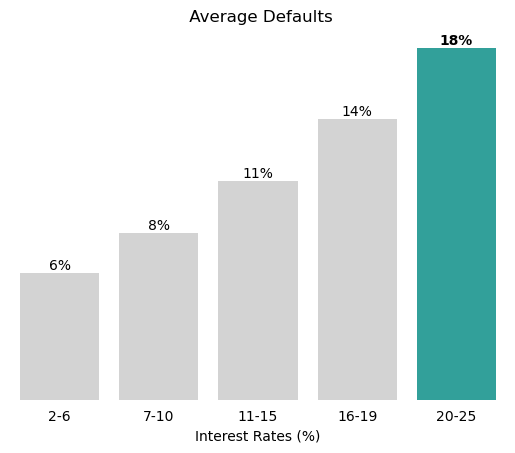

In [6]:
e.plt_1(train.copy)